### 现有一批描述家庭用电情况的数据，对数据进行算法模型预测，并最终得到预测模型（每天各个时间段和功率之间的关系、功率与电流之间的关系等） 建议：使用python的sklearn库的linear_model中LinearRegression来获取算法

In [ ]:
# 引入所需要的全部包
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time

In [ ]:
## 创建一个时间字符串格式化字符串
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [ ]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [ ]:
# 加载数据
#path = 'datas\household_power_consumption.txt' ## 全部数据
#path = 'datas\household_power_consumption_200.txt' ## 200行数据
path = 'datas\household_power_consumption_1000.txt' ## 1000行数据
df = pd.read_csv(path, sep=';', low_memory=False)

# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率
names=['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# 异常数据处理(异常数据过滤)
new_df = df.replace('?', np.nan)
datas = new_df.dropna(how = 'any') # 只要有列为空，就进行删除操作

In [ ]:
## 时间和电压之间的关系(Linear)
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]]

# 对数据集进行测试集合训练集划分
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

# 模型训练
lr = LinearRegression()
lr.fit(X_train, Y_train) ## 训练模型

# 模型校验
y_predict = lr.predict(X_test) ## 预测结果

# 模型效果
print "准确率:",lr.score(X_test, Y_test)

## 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t, Y_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, y_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u'线性回归预测时间和功率之间的关系', fontsize=20)
plt.grid(b=True)
plt.show()

1阶，系数为： [  0.00000000e+00   8.88178420e-16   2.22044605e-16   3.97781449e+00
   8.73334650e-01   1.70647992e-01   0.00000000e+00]
2阶，系数为： [  5.10345251e+11   6.09119825e+11  -1.42094277e+12  -1.52946831e+13
   2.95071315e+00   2.70237115e-01   4.00377945e+10  -1.09421851e+11
  -4.02835830e+10   7.81250000e-03   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -3.79580303e+13  -2.49794922e+01
  -5.12695312e-01   0.00000000e+00  -1.02280273e+01  -4.59960938e-01
   0.00000000e+00  -3.46679688e-02   0.00000000e+00   0.00000000e+00]
3阶，系数为： [ -1.36877155e+09  -8.01634280e+08  -4.39497695e+07  -3.12703267e+11
  -6.94395787e+10  -2.22717603e+07  -2.27680191e+08   1.32966416e+08
  -3.89594810e+09  -1.46997502e+09  -9.27958754e+08   1.98992726e+09
   2.62108952e+09   1.72358943e+09  -5.04167486e+08   2.39090541e+09
  -2.86881035e+09   0.00000000e+00   1.58707563e+11   2.79797539e+10
   8.97410996e+06   0.000

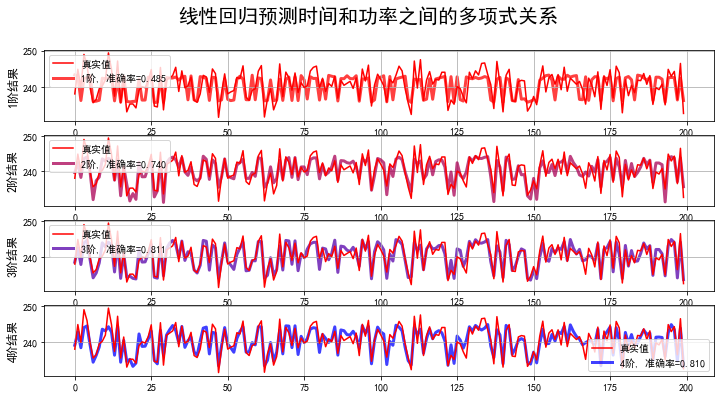

In [8]:
## 时间和电压之间的关系(Linear-多项式)
models = [
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LinearRegression())
        ])
]
model = models[0]
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]]

# 对数据集进行测试集合训练集划分
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

# 模型训练
t=np.arange(len(X_test))
N = 5
d_pool = np.arange(1,N,1) # 阶
m = d_pool.size
clrs = [] # 颜色
for c in np.linspace(16711680, 255, m):
    clrs.append('#%06x' % c)
line_width = 3

plt.figure(figsize=(12,6), facecolor='w')
for i,d in enumerate(d_pool):
    plt.subplot(N-1,1,i+1)
    plt.plot(t, Y_test, 'r-', label=u'真实值', ms=10, zorder=N)
    model.set_params(Poly__degree=d) ## 设置多项式的阶乘
    model.fit(X_train, Y_train)
    lin = model.get_params('Linear')['Linear']
    output = u'%d阶，系数为：' % d
    print output, lin.coef_.ravel()
    
    y_hat = model.predict(X_test)
    s = model.score(X_test, Y_test)
    
    z = N - 1 if (d == 2) else 0
    label = u'%d阶, 准确率=%.3f' % (d,s)
    plt.plot(t, y_hat, color=clrs[i], lw=line_width, alpha=0.75, label=label, zorder=z)
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.ylabel(u'%d阶结果' % d, fontsize=12)

## 预测值和实际值画图比较
plt.legend(loc = 'lower right')
plt.suptitle(u"线性回归预测时间和功率之间的多项式关系", fontsize=20)
plt.grid(b=True)
plt.show()